8) Questão - Média de dias do  nascimento a sexagem de acordo com registros do BioterC 


Hipótese:
Média de dias entre o período do nasicmento dos animais até a sexagem é de 21 a 30 dias em camundongos isogêncos e 21 dias para heterogênicos.


In [1]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os

plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

In [2]:
#lista das tabelas disponíveis

t = os.listdir('../tabelas_test') #listar o que tem dentro do diretório que for indicado
chave_arq = 12 #indice na lista t que indica o documento .csv analisado
for k, v in enumerate(t):
    print(f'{k} - {v}')

0 - .ipynb_checkpoints
1 - est_nasc_2019-06-18.csv
2 - iris.csv
3 - nasc_rast_2019-06-18.csv
4 - licenciamento_2019-06-18.csv
5 - users_2019-06-18.csv
6 - linhagens_2019-06-18.csv
7 - grupos_acas_2019-06-18.csv
8 - material_2019-06-18.csv
9 - est_est_2019-06-18.csv
10 - pedido_2019-06-18.csv
11 - laboratorios_2019-06-18.csv
12 - est_est_log_2019-06-18.csv
13 - mater_est_est_2019-06-18.csv


In [3]:
# Tabelas contendo o numero de instâncias e colunas

shap_arq = dict() #dicionário shap (com esse nome por conta da função shape - que numera numero de instancias e colunas)
for k, v in enumerate(t): #laço para percorrer a lista t, que cotém os nomes dos arquivos no diretório analisado
    if k != 0 and k != 2: #comando if condicional para ignorar os arquivos t[0] e t[2]
        db = pd.read_csv('../tabelas_test/' + str(t[k])).shape #função, read_csv, para abrir os arquivos .csv e função,shape, para mostrar o numero de instâncias e colunas.
        shap_arq[v] = [db[0], db[1]] #inserir lista com os valores db[0] (n° instâncias) e db[1] (n° colunas) no dicionário shap_arq com a chave v (nome do arquivo)
shap_arq

{'est_nasc_2019-06-18.csv': [1812, 7],
 'nasc_rast_2019-06-18.csv': [8679, 13],
 'licenciamento_2019-06-18.csv': [1, 2],
 'users_2019-06-18.csv': [5, 11],
 'linhagens_2019-06-18.csv': [10, 3],
 'grupos_acas_2019-06-18.csv': [30, 6],
 'material_2019-06-18.csv': [34, 6],
 'est_est_2019-06-18.csv': [600, 28],
 'pedido_2019-06-18.csv': [403, 20],
 'laboratorios_2019-06-18.csv': [10, 3],
 'est_est_log_2019-06-18.csv': [18293, 29],
 'mater_est_est_2019-06-18.csv': [11, 7]}

In [4]:
#Tabelas que contem a coluna de linhagens

ling_pos = dict()
for a in shap_arq:
    arquivos = pd.read_csv('../tabelas_test/' + str(a))
    for l in arquivos.columns:
        if l == 'ling':
            ling_pos[a] = arquivos
for j in ling_pos.keys():
    print(f'{j}')

est_nasc_2019-06-18.csv
nasc_rast_2019-06-18.csv
est_est_2019-06-18.csv
pedido_2019-06-18.csv
est_est_log_2019-06-18.csv


In [5]:
#Listas contendo informações das linhagens

ling_names = list(ling_pos[t[chave_arq]]['ling'].drop_duplicates())

# ling_names = list(ling_pos[t[12]])

# ling_names = list(ling_pos['est_est_log_2019-06-18.csv']['ling'].drop_duplicates())
'''
ling_grafico foi criado como um dicionário para conter todas as informações abaixo e tb
para plotar as informações
'''
ling_grafico = dict()
d = 0 #variável d foi atribuído ao valor 0. c será utilizada para finalizar o laço while
val = list() #val é uma variável do tipo lista que irá receber os valores de interesse
historico_num_a = list()
'''
while mantem o laço enquanto d for menor que o número de linhagens, len(ling_names)
'''
while d < len(ling_names):
    '''
    condição para que as linhagens "Test", "Swiss" e "AAA" não sejam analisadas, pois não são linhagens
    reais
    '''
    ex_ling = ('Test', 'AAA', 'Swiss', 'C57BL06WT\t', 'Swiss/CFW B', 'Swiss/CFW D','Swiss/CFW A',
               'Swiss/CFW C', 'Swiss/CFW', 'Swiss-2', 'Swiss-2 A ', 'NZB/BINJ','NZW/LacJ','NOD / SHILTJ')
    if ling_names[d] not in ex_ling:
        na = 0 #variável na (soma do número de animais) recebe o valor 0
        soma_util = 0 #variável que soma o número de eventos de nascimento, coluna util == 'nasc'
        soma_util_sex = 0
        soma_dias_nascimentos = 0
        soma_dias_sexagem = 0
        soma_sex_m = 0
        na_sex_m = 0
        soma_sex_f = 0
        na_sex_f = 0
        '''
        #laço para percorrer as chaves (k) e os valores (v) na Serie ling_pos[t[chave_arq]]['ling'], 
        referente a coluna 'ling' no DataFrame t[chave_arq] do dicionário ling_pos.
        '''
        for k, v in enumerate(ling_pos[t[chave_arq]]['ling']):
            '''
            uma condição para que os valores (v) em ling_pos[t[chave_arq]]['ling']' sejam iguais a 
            cada um dos valores (ling_names[d]) referntes aos nomes das linhgens não repetidas
            '''
            if v == ling_names[d]:
                '''
                num_a é uma variável do tipo Serie que recebe ling_pos[t[chave_arq]] valor da coluna
                ['num_ani'], pela função loc[k], com a chave k
                '''
                num_a = ling_pos[t[chave_arq]]['num_nasc'].loc[k]
                '''
                util_a é uma variável do tipo Serie que recebe ling_pos[t[chave_arq]] valor da coluna
                ['util'], pela função loc[k], com a chave k
                '''
                util_a = ling_pos[t[chave_arq]]['util'].loc[k]
                '''
                #data_acasalamento = pd.to_datetime(ling_pos[t[chave_arq]]['date_acas'].loc[k], unit = 's')
                data_acasalamento
                '''
                data_acasalamento = ling_pos[t[chave_arq]]['date_acas'].loc[k]
                data_nascimento = ling_pos[t[chave_arq]]['date_nasc_acas'].loc[k]
                data_sexagem = ling_pos[t[chave_arq]]['date_sex'].loc[k]
                '''
                condição para que o num_a (numero de animais) seja menor ou igual a 200, porque no sql o 
                valor 666 é referente a NULL (ausencia de valor) e que a variável util_a seja igual a 
                "nasc", referente a registro de nascimento
                '''
                if num_a <= 200 and util_a == 'nasc':
                    soma_util += 1 #soma ele mesmo mais 1
                    na += num_a #soma ele mesmo mais o número de animais
                    soma_dias_nascimentos += int((data_nascimento - data_acasalamento)/86400)
                    historico_num_a.append(num_a)
                '''
                condição para que o num_a (numero de animais) seja menor ou igual a 200, porque
                valor 666 é referente a NULL (ausência de valor) e que a variável util_a seja igual
                "sex", referente a registro de sexagem.
                '''
                if num_a <= 200 and util_a == 'sex':
                    soma_util_sex += 1 #soma ele mesmo mais 1
                    soma_dias_sexagem += int((data_sexagem - data_nascimento)/86400)
                    if ling_pos[t[chave_arq]]['num_sex_m'].loc[k] <= 200:
                        soma_sex_m += 1 #soma ele mesmo mais 1
                        na_sex_m += ling_pos[t[chave_arq]]['num_sex_m'].loc[k] #soma ele mesmo mais o número de animais
                    else:
                        soma_sex_f += 1 #soma ele mesmo mais 1
                        na_sex_f += ling_pos[t[chave_arq]]['num_sex_f'].loc[k] #soma ele mesmo mais o número de animais
                        
                        
        '''
        variável do tipo lista que recebe numero de animais e número de eventos de nascimentos para cada
        linhagem
        
       >> Daria pra criar uma função?
        '''
        if soma_util == 0: #condição para que soma_util seja igual a zero
            med = 0
            med_nascimentos = 0
        else: #se não for, a soma do numero de animais na dividido por soma_util
            med = round(na/soma_util, 2)
            med_nascimentos = round(soma_dias_nascimentos/soma_util, 2)
        if soma_util_sex == 0: #condição para que soma_util da sexagem seja igual a zero
            med_sexagem = 0 #variável que recebe valor zero
        else: #se não for, a soma do numero de animais na dividido por soma_util de sexagem
            med_sexagem = round(soma_dias_sexagem/soma_util_sex, 2)
        if soma_sex_m == 0: #condição para que soma_sex_m seja igual a zero
            med_sex_m = 0 #variavel que recebe o valor zero
        else: #se não for, a soma do numero de animais na dividido por soma_util de sexagem do sexo m
            med_sex_m = round(na_sex_m/soma_sex_m, 2)
        if soma_sex_f == 0: #condição para que soma_sex_f seja igual a zero
            med_sex_f = 0 #variavel que recebe o valor zero
        else:#se não for, a soma do numero de animais na dividido por soma_util de sexagem do sexo f
            med_sex_f = round(na_sex_f/soma_sex_f, 2)
        val = [na, soma_util, med, med_nascimentos, med_sexagem, na_sex_m, soma_sex_m, med_sex_m, na_sex_f, soma_sex_f, med_sex_f, historico_num_a[:]]
        '''
        é um dicionário que recebe uma cópia da lista val (número de animais nascidos e número de 
        nascimentos) com a chave ling_names[d] (nome das linhagens)
        '''
        ling_grafico[ling_names[d]] = val[:]
        val.clear()
        historico_num_a.clear()
    d += 1 #soma ele mesmo mais 1

In [6]:
#Célula com tabela das médias e informações das linhagens
'''
Célula com tabela das médias e informações das linhagens
'''


'''
transf_graficos é uma variável do tipo DataFrame que recebe o dicionário ling_grafico
atraves da função from_dict que converte dicionarios para DataFrame
'''
transf_graficos = pd.DataFrame.from_dict(ling_grafico)
'''
testa_graficos é uma variável do tipo DataFrame.
'''
test_graficos = pd.DataFrame()
'''
cria a coluna ling na DataFrame test_graficos que recebe as colunas da DataFrame transf_graficos.
As colunas são os nomes das linhgens.
'''
test_graficos['ling'] = transf_graficos.columns
'''
cria a coluna num na DataFrame test_graficos que recebe os valores (função values) no index 0
(função loc[0]) da DataFrame transf_graficos. O index 0 são os números de animais para cada linhagem
'''
test_graficos['num'] = transf_graficos.loc[0].values
'''
cria a coluna eventos na DataFrame test_graficos que recebe os valores (função values) no index 1
(função loc[1]) da DataFrame transf_graficos. O index 1 são os números de eventos de nascimentos para cada
linhagem
'''
test_graficos['eventos'] = transf_graficos.loc[1].values
'''
cria a coluna med na DataFrame test_graficos que recebe os valores das médias aritméticas de 
número de nascimentos por evento
'''
test_graficos['med'] = transf_graficos.loc[2].values

'''
cria a coluna med_dias_nasc na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento
'''
test_graficos['med_dias_nasc'] = transf_graficos.loc[3].values
'''
cria a coluna med_dias_sex na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento
'''
test_graficos['med_dias_sex'] = transf_graficos.loc[4].values
'''
cria a coluna num_sex_m na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento, além da coluna soma_sex_m. 
'''
test_graficos['num_sex_m'] = transf_graficos.loc[5].values
test_graficos['soma_sex_m'] = transf_graficos.loc[6].values
'''
cria a coluna med_sex_m na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento 
'''
test_graficos['med_sex_m'] = transf_graficos.loc[7].values
'''
cria a coluna num_sex_f na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento, além da coluna soma_sex_f. 
'''
test_graficos['num_sex_f'] = transf_graficos.loc[8].values
test_graficos['soma_sex_f'] = transf_graficos.loc[9].values
'''
cria a coluna med_sex_f na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento. 
'''
test_graficos['med_sex_f'] = transf_graficos.loc[10].values
'''
cria a coluna hist_num_a na DataFrame test_graficos que recebe os valores das médias 
aritméticas de número de nascimentos por evento. 
'''
test_graficos['hist_num_a'] = transf_graficos.loc[11].values
'''
função set_index utiliza a coluna ling como indece da DataFrame test_graficos
'''
test_graficos = test_graficos.set_index('ling')
test_graficos.head() #função head() que mostra as primeiros 5 inst
#test_graficos.sort_values(['ling']).index

,num,eventos,med,med_dias_nasc,med_dias_sex,num_sex_m,soma_sex_m,med_sex_m,num_sex_f,soma_sex_f,med_sex_f,hist_num_a
ling,,,,,,,,,,,,
Swiss A,165,14,11.79,74.79,11.65,35,9,3.89,38,11,3.45,"[12, 12, 4, 19, 30, 8, 16, 10, 5, 15, 11, 14, ..."
Swiss B,115,11,10.45,35.82,14.31,25,9,2.78,13,4,3.25,"[10, 4, 10, 8, 9, 5, 10, 9, 10, 12, 28]"
Swiss C,249,15,16.6,33.53,10.93,30,8,3.75,22,6,3.67,"[20, 40, 60, 8, 16, 9, 9, 3, 11, 8, 19, 6, 9, ..."
Swiss D,136,13,10.46,50.69,10.2,31,9,3.44,21,6,3.5,"[10, 10, 6, 14, 9, 9, 9, 12, 6, 8, 10, 16, 17]"
Swiss E,257,22,11.68,45.18,12.92,18,5,3.6,23,7,3.29,"[5, 10, 10, 20, 18, 26, 34, 11, 22, 10, 11, 7,..."


In [7]:
#Concatenação de linhagens S129WT

a = 'S129WT'
b = ' S129WT'
c = '129/SV-E'

cento = test_graficos.loc[[a, b, c]].sum() #soma as intancias entre as linhagens que quero concatenar
cento[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = cento[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/3 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[c, test_graficos.columns] = cento
test_graficos.drop([a,b], inplace=True)
cento #print

num                                                            905
eventos                                                        149
med                                                        7.57667
med_dias_nasc                                              45.4367
med_dias_sex                                               8.98333
num_sex_m                                                      229
soma_sex_m                                                      72
med_sex_m                                                  3.19333
num_sex_f                                                      188
soma_sex_f                                                      61
med_sex_f                                                  3.44667
hist_num_a       [8, 2, 4, 5, 9, 3, 9, 8, 8, 4, 6, 8, 19, 7, 17...
dtype: object

In [8]:
#Concatenação de linhagens S129KO

a = 'S129KO'
b = ' S129KO'

ko = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
ko[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = ko[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a , test_graficos.columns] = ko #linhagem que quer manter
test_graficos.drop([b], inplace=True) #linhagem que quer excluir
ko

num                                                           1612
eventos                                                        250
med                                                          5.895
med_dias_nasc                                               58.345
med_dias_sex                                                14.385
num_sex_m                                                      398
soma_sex_m                                                     123
med_sex_m                                                     3.12
num_sex_f                                                      335
soma_sex_f                                                      95
med_sex_f                                                    3.265
hist_num_a       [5, 6, 3, 15, 5, 4, 7, 8, 7, 6, 3, 2, 4, 5, 5,...
dtype: object

In [9]:
#Concatenação de linhagens C57BL/06

a = 'C57BL/6'
b = 'C57BL06WT'

black = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
black[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = black[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a, test_graficos.columns] = black #linhagem que quer manter
test_graficos.drop([b], inplace=True)
black

num                                                           4001
eventos                                                        460
med                                                           8.05
med_dias_nasc                                               56.405
med_dias_sex                                                  15.2
num_sex_m                                                     1091
soma_sex_m                                                     280
med_sex_m                                                     3.62
num_sex_f                                                      748
soma_sex_f                                                     203
med_sex_f                                                    3.185
hist_num_a       [5, 7, 8, 9, 11, 5, 4, 4, 7, 7, 10, 8, 7, 6, 1...
dtype: object

In [10]:
#Concatenação de linhagens SWISS-1 A

a = 'Swiss-1 A'
b = 'Swiss A'

s_A = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
s_A[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = s_A[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a, test_graficos.columns] = s_A #linhagem que quer manter
test_graficos.drop([b], inplace=True)
s_A

num                                                            404
eventos                                                         37
med                                                          11.09
med_dias_nasc                                               59.655
med_dias_sex                                                14.375
num_sex_m                                                       95
soma_sex_m                                                      30
med_sex_m                                                    3.375
num_sex_f                                                      107
soma_sex_f                                                      32
med_sex_f                                                     3.37
hist_num_a       [10, 8, 8, 14, 8, 16, 7, 12, 9, 12, 11, 7, 12,...
dtype: object

In [11]:
#Concatenação de linhagens SWISS-1 B

a = 'Swiss-1 B'
b = 'Swiss B'

s_B = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
s_B[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = s_B[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a, test_graficos.columns] = s_B #linhagem que quer manter
test_graficos.drop([b], inplace=True)
s_B

num                                                            344
eventos                                                         32
med                                                         10.675
med_dias_nasc                                                36.41
med_dias_sex                                                15.485
num_sex_m                                                      107
soma_sex_m                                                      33
med_sex_m                                                      3.1
num_sex_f                                                       71
soma_sex_f                                                      21
med_sex_f                                                     3.33
hist_num_a       [10, 9, 10, 14, 13, 11, 11, 13, 7, 4, 11, 12, ...
dtype: object

In [12]:
#Concatenação de linhagens Swiss-1 C

a = 'Swiss-1 C'
b = 'Swiss C'

s_C = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
s_C[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = s_C[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a, test_graficos.columns] = s_C #linhagem que quer manter
test_graficos.drop([b], inplace=True)
s_C

num                                                            413
eventos                                                         32
med                                                         13.125
med_dias_nasc                                               35.205
med_dias_sex                                                 15.25
num_sex_m                                                       88
soma_sex_m                                                      25
med_sex_m                                                     3.58
num_sex_f                                                       59
soma_sex_f                                                      19
med_sex_f                                                     3.26
hist_num_a       [8, 10, 10, 14, 11, 14, 5, 3, 11, 7, 13, 8, 13...
dtype: object

In [13]:
#Concatenação de linhagens SWISS-1 D

a = 'Swiss-1 D'
b = 'Swiss D'

s_D = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
s_D[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = s_D[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a, test_graficos.columns] = s_D #linhagem que quer manter
test_graficos.drop([b], inplace=True)
s_D

num                                                            311
eventos                                                         31
med                                                          10.09
med_dias_nasc                                               45.125
med_dias_sex                                                 13.53
num_sex_m                                                       89
soma_sex_m                                                      25
med_sex_m                                                     3.53
num_sex_f                                                       61
soma_sex_f                                                      19
med_sex_f                                                     3.29
hist_num_a       [9, 14, 10, 8, 6, 13, 4, 6, 12, 11, 7, 10, 13,...
dtype: object

In [14]:
#Concatenação de linhagens SWISS-1 E

a = 'Swiss-1 E'
b = 'Swiss E'

s_E = test_graficos.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
s_E[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = s_E[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/2 
#linha serve para incluir todas as colunas que possuem um valor médio, já somados serão dividios pelo numero de linhagens, nesse caso, são 3
test_graficos.at[a, test_graficos.columns] = s_E #linhagem que quer manter
test_graficos.drop([b], inplace=True)
s_E

num                                                            531
eventos                                                         47
med                                                          11.32
med_dias_nasc                                                39.61
med_dias_sex                                                13.015
num_sex_m                                                       74
soma_sex_m                                                      23
med_sex_m                                                    3.355
num_sex_f                                                       90
soma_sex_f                                                      26
med_sex_f                                                     3.41
hist_num_a       [10, 8, 9, 12, 8, 12, 16, 9, 12, 10, 8, 8, 9, ...
dtype: object

In [15]:
#Média de linhagens heterogenicas

a = 'Swiss-1 A'
b = 'Swiss-1 B'
c = 'Swiss-1 C'
d = 'Swiss-1 D'
e = 'Swiss-1 E'
f = 'Swiss-2 A'
g = 'Swiss-2 B'
h = 'Swiss-2 C'
i = 'Swiss-2 D'
j = 'Swiss-2 E'

soma_het = test_graficos.loc[[a, b, c, d, e, f, g, h, i, j]].sum() #soma as intancias entre as linhagens que quero concatenar
soma_het[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = soma_het[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/10 
#pra fazer a mediana deve criar uma coluna?
soma_het

num                                                           3204
eventos                                                        293
med                                                         10.917
med_dias_nasc                                              39.0745
med_dias_sex                                               15.1955
num_sex_m                                                      870
soma_sex_m                                                     243
med_sex_m                                                    3.642
num_sex_f                                                      620
soma_sex_f                                                     182
med_sex_f                                                    3.458
hist_num_a       [10, 8, 8, 14, 8, 16, 7, 12, 9, 12, 11, 7, 12,...
dtype: object

In [16]:
#Media das linhagens isogênicas

a = '129/SV-E'
b = 'AG129'
c = 'Balb/c'
d = 'C3H'
e = 'C57BL/06'
f = 'DBA/1j'
g = 'S129KO'

soma_iso = test_graficos.loc[[a, b, c, d, e, f, g]].sum() #soma as intancias entre as linhagens que quero concatenar
soma_iso[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']] = soma_iso[['med', 'med_dias_nasc', 'med_dias_sex', 'med_sex_m', 'med_sex_f']]/7 
soma_iso

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


num              7452.000000
eventos          1008.000000
med                 4.681667
med_dias_nasc      39.283095
med_dias_sex       15.559762
num_sex_m        1670.000000
soma_sex_m        514.000000
med_sex_m           2.227619
num_sex_f        1644.000000
soma_sex_f        469.000000
med_sex_f           2.594524
dtype: float64

In [17]:
#Média e mediana em linhagens heterogênicas

a = 'Swiss-1 A'
b = 'Swiss-1 B'
c = 'Swiss-1 C'
d = 'Swiss-1 D'
e = 'Swiss-1 E'
f = 'Swiss-2 A'
g = 'Swiss-2 B'
h = 'Swiss-2 C'
i = 'Swiss-2 D'
j = 'Swiss-2 E'

median_het = round(pd.Series(test_graficos['hist_num_a'].loc[[a,b,c,d,e,f,g,h,i,j]].sum()).median(), 2)
mean_het = round(pd.Series(test_graficos['hist_num_a'].loc[[a,b,c,d,e,f,g,h,i,j]].sum()).mean(), 2)

#Média e mediana em linhagens Isogênicas

a = '129/SV-E'
b = 'AG129'
c = 'Balb/c'
d = 'C3H'
e = 'C57BL/6'
f = 'DBA/1j'
g = 'S129KO'

median_iso = round(pd.Series(test_graficos['hist_num_a'].loc[[a,b,c,d,e]].sum()).median(), 2)
mean_iso = round(pd.Series(test_graficos['hist_num_a'].loc[[a,b,c,d,e]].sum()).mean(), 2)

d = {'median_het': median_het,
     'mean_het': mean_het,
     'median_iso': median_iso,
     'mean_iso': mean_iso
}
d

{'median_het': 10.0, 'mean_het': 10.94, 'median_iso': 7.0, 'mean_iso': 8.08}

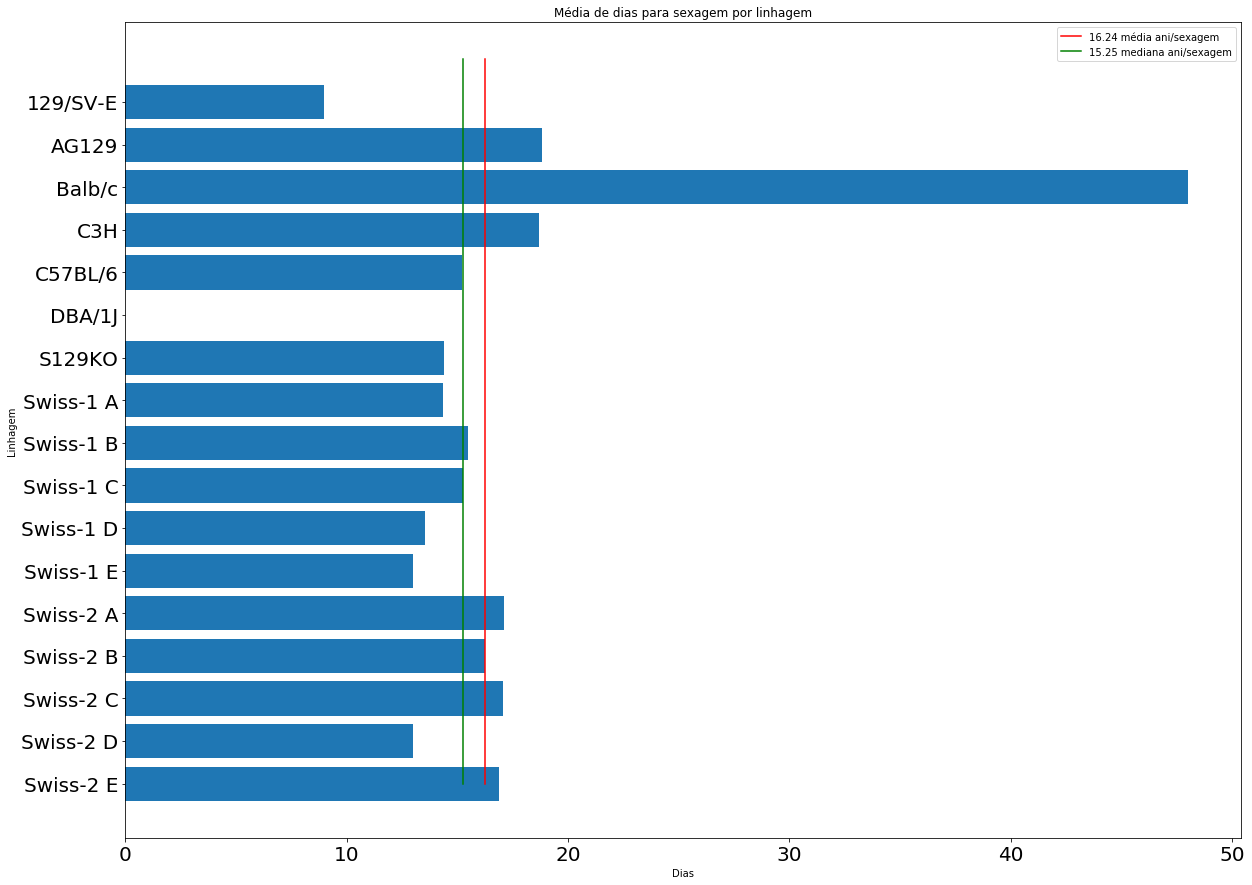

In [19]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Calculo de média e mediana

media_geral = round(test_graficos['med_dias_sex'].sum() / len(test_graficos.index), 2)
mediana_geral = round(test_graficos.median()['med_dias_sex'],2) #mediana

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Plotagem de linhas (média e mediana)

plt.figure(figsize=(20,15))
plt.barh(
    y=test_graficos.sort_values(['ling'], ascending=False).index,
    width=test_graficos.sort_values(['ling'], ascending=False)['med_dias_sex']
)
plt.plot(
    [media_geral, media_geral],
    [len(test_graficos.index), 0],
    c='red'
)

plt.plot( #função para plotar o gráfico
    [mediana_geral, mediana_geral], #faixa que marca a mediana
    [len(test_graficos.index), 0], 
    c='green' #cor verde da faixa
)

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Configurações do gráfico

plt.legend([str(media_geral) + ' média ani/sexagem', str(mediana_geral) + ' mediana ani/sexagem']) #legenda do gŕafico
plt.ylabel('Linhagem')
plt.xlabel('Dias')
plt.title('Média de dias para sexagem por linhagem')
plt.savefig(
    fname="../resultados/8_pergunta_Dias_Sex_Lin_2019-06-25-rela-esse.png",
    bbox_inches='tight',
    dpi=150,
    transparent=True
)


Resultados:

Nos registros analisados, a média de dias do nascimento a sexagem entre os camundongos foi de 16.24 dias
e a mediana de 15.25 dias, diferente do que é observado na rotina em que o período de sexagem é de 21 a 30 dias variando entre as linhagens. Estando bem abaixo do que é visto em literatura Sendo analisada a rotina dos técnicos no biotério, acredita-se ser provável que os registros estejam sendo realizadas fora da data correta, sendo mais uma proposta de melhoria na gestão do biotério, à saber, a melhora nas condições dos registros dos dados.


Desdobramento: Após avaliar o período entre nascimento e sexagem, os dados se apresentam abaixo da média nas linhagens, tirando Balb/c, sugerindo que os registros estão sendo antes do tempo. Está ocorrendo algum problema nos registros desses períodos? 